In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler,scale
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.layers import Dense
from keras.models import Sequential

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
data['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [7]:
data['TEY'].unique()

array([114.7 , 114.72, 114.71, ..., 123.78, 121.26, 115.52])

In [8]:
X = data.iloc[:,:3]
Y = data['TEY'] 

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=17)

In [11]:
model = Sequential()
model.add(Dense(12, input_dim=3,kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform',activation='relu'))
model.add(Dense(3, kernel_initializer='uniform'))

In [12]:
model.compile(loss="mean_squared_error",optimizer = "adam",metrics = ["mse"])

In [13]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=10)

Epoch 1/50
1204/1204 [==============================] - 4s 2ms/step - loss: 1579.4623 - mse: 1579.4623
Epoch 2/50
1204/1204 [==============================] - 3s 2ms/step - loss: 253.7480 - mse: 253.7480
Epoch 3/50
1204/1204 [==============================] - 3s 2ms/step - loss: 248.8615 - mse: 248.8615
Epoch 4/50
1204/1204 [==============================] - 3s 3ms/step - loss: 242.9673 - mse: 242.9673
Epoch 5/50
1204/1204 [==============================] - 3s 2ms/step - loss: 237.3775 - mse: 237.3775
Epoch 6/50
1204/1204 [==============================] - 3s 3ms/step - loss: 233.9478 - mse: 233.9478
Epoch 7/50
1204/1204 [==============================] - 3s 3ms/step - loss: 231.4998 - mse: 231.4998
Epoch 8/50
1204/1204 [==============================] - 4s 3ms/step - loss: 228.6957 - mse: 228.6957
Epoch 9/50
1204/1204 [==============================] - 3s 3ms/step - loss: 228.5791 - mse: 228.5791
Epoch 10/50
1204/1204 [==============================] - 3s 2ms/step - loss: 227.3836 - m

In [15]:
scores = model.evaluate(X_train,Y_train)
print((model.metrics_names[1],scores[1]))

376/376 [==============================] - 1s 1ms/step - loss: 223.4061 - mse: 223.4061
('mse', 223.40609741210938)


In [21]:
y_pred = model.predict(X_test)
y_pred = pd.Series([i[0] for i in y_pred])
y_pred

0       138.497330
1       135.136398
2       142.455383
3       138.948425
4       136.783173
           ...    
3003    130.690872
3004    136.927811
3005    141.802979
3006    142.148392
3007    132.591736
Length: 3008, dtype: float32

In [22]:
rmse_value = np.sqrt(np.mean((y_pred-Y_test)**2))
rmse_value

19.249532656788606

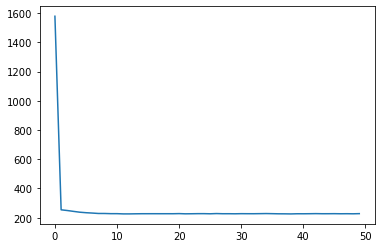

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])